In [6]:
#Dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
from collections import Counter
import numpy as np
import os
import csv

In [7]:
#Read raw csv for all_goalkeepers_working_copy

gk_Cleaning = "Resources/all_goalkeepers_working_copy.csv"
gk_cleaning = pd.read_csv(gk_Cleaning)
gk_cleaning

,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
0,Mark Dodd,DAL,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg
1,Tony Meola,MET,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg
2,Mark Dougherty,TB,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg
3,Jorge Campos,LA,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg
4,Garth Lagerwey,KC,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,Adrian Zendejas,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2020,post
2002,Mason Stajduhar,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2020,post
2003,Brady Scott,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2020,post
2004,Kendall McIntosh,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2020,post


In [8]:
def club_cleaner(club):
    return(club.replace(' ', ''))

In [9]:
#Sometime the code breaks and sometimes it works...

gk_cleaning['Club'] = gk_cleaning.Club.apply(club_cleaner)

AttributeError: 'float' object has no attribute 'replace'

In [5]:
gk_cleaning.Club.value_counts()

NameError: name 'gk_cleaning' is not defined

In [70]:
# Eliminate rows past 2019
indexNames = gk_cleaning[ gk_cleaning["Year"] > 2019 ].index
# Delete these row indexes from dataFrame
gk_cleaning.drop(indexNames , inplace=True)
gk_cleaning

,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
0,Mark Dodd,club,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg
1,Tony Meola,club,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg
2,Mark Dougherty,club,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg
3,Jorge Campos,club,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg
4,Garth Lagerwey,club,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,Phillip Ejimadu,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,post
1848,Kendall McIntosh,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,post
1849,Pablo Sisniega,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,post
1850,Brendan Moore,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,post


In [71]:
# Eliminate post season rows
indexNames = gk_cleaning[ gk_cleaning["Season"] == "post" ].index
# Delete these row indexes from dataFrame
gk_cleaning.drop(indexNames , inplace=True)
gk_cleaning

,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
0,Mark Dodd,club,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg
1,Tony Meola,club,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg
2,Mark Dougherty,club,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg
3,Jorge Campos,club,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg
4,Garth Lagerwey,club,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,Brendan Moore,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1227,Jeff Caldwell,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1228,Adam Grinwis,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1229,Thomas Hasal,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg


In [72]:
gk_cleaning.drop_duplicates(subset=['Player', 'Year', "Minutes"], keep='last')

,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
23,Mark Dodd,club,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg
24,Tony Meola,club,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg
25,Mark Dougherty,club,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg
26,Jorge Campos,club,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg
27,Garth Lagerwey,club,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,Brendan Moore,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1227,Jeff Caldwell,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1228,Adam Grinwis,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1229,Thomas Hasal,club,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg


In [73]:
# Minutes vs. Goals Against Average
gk_cleaning_900=gk_cleaning
indexNames = gk_cleaning_900[ gk_cleaning_900["Minutes"] < 900  ].index
# Delete these row indexes from dataFrame
gk_cleaning_900.drop(indexNames , inplace=True)
gk_cleaning_900_drop_col=gk_cleaning_900.drop(["Position", "Games Played", "GS", "ShO", "Won", "Loss", "Tie", "Goals Against", "Save %", "Shots", "SV", "Season", "PKG/A"], axis = 1)
gk_cleaning_900_drop_col
gk_cleaning_900_drop_col.sort_values(by =["Minutes", "Goals Against Average"], ascending=False)

,Player,Club,Minutes,Goals Against Average,Winning %,Year
1071,David Bingham,club,3060,1.88,38.2,2018
930,Joe Bendik,club,3060,1.76,26.5,2016
1151,Daniel Vega,club,3060,1.62,38.2,2019
866,Steve Clark,club,3060,1.56,44.1,2015
1072,Evan Bush,club,3060,1.56,41.2,2018
...,...,...,...,...,...,...
636,Greg Sutton,club,900,1.50,30.0,2011
758,Joe Cannon,club,900,1.40,30.0,2013
823,Jeff Attinella,club,900,1.40,20.0,2014
398,Noah Palmer,club,900,1.30,10.0,2006


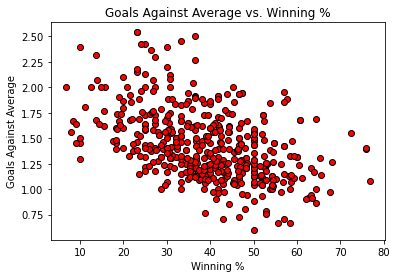

<Figure size 432x288 with 0 Axes>

In [74]:

x_axis = gk_cleaning_900_drop_col[("Winning %")]
x_limit = 60
x_axis
y_axis = gk_cleaning_900_drop_col[("Goals Against Average")]
y_limit = 3
y_axis
#Minutes = gk_cleaning_900_drop_col[('Minutes')]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red",edgecolors="black",) 
#plt.ylim(0,3)
plt.title("Goals Against Average vs. Winning %")
plt.xlabel("Winning %")
plt.ylabel("Goals Against Average")
plt.show()
plt.savefig("../Scatter_Plots/GAA_vs_Winning_per.png")

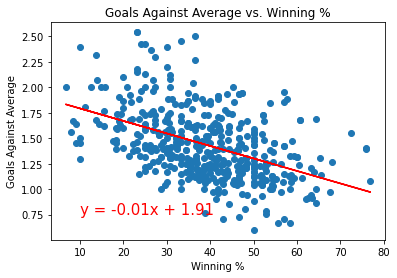

In [75]:
x_values =  gk_cleaning_900_drop_col[("Winning %")]
y_values = gk_cleaning_900_drop_col[("Goals Against Average")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Goals Against Average vs. Winning %")
plt.xlabel("Winning %")
plt.ylabel("Goals Against Average")
plt.savefig("../Scatter_Plots/GAA_vs_Winning_per_Regress.png")

In [76]:
# Minutes vs. Winning %

gk_cleaning_900=gk_cleaning
indexNames = gk_cleaning_900[ gk_cleaning_900["Minutes"] < 900  ].index
# Delete these row indexes from dataFrame
gk_cleaning_900.drop(indexNames , inplace=True)
gk_cleaning_Min_Win=gk_cleaning_900.drop(["Position", "Games Played", "GS", "ShO", "Won", "Loss", "Tie", "Goals Against", "Goals Against Average", "Save %", "Shots", "SV", "Season", "PKG/A"], axis = 1)
gk_cleaning_Min_Win
gk_cleaning_Min_Win.sort_values(by =['Minutes', 'Winning %'], ascending=False)

,Player,Club,Minutes,Winning %,Year
803,Stefan Frei,club,3060,58.8,2014
615,Kasey Keller,club,3060,52.9,2011
674,Jimmy Nielsen,club,3060,52.9,2012
863,Luis Robles,club,3060,52.9,2015
1070,Tim Melia,club,3060,52.9,2018
...,...,...,...,...,...
1096,Brian Rowe,club,900,30.0,2018
823,Jeff Attinella,club,900,20.0,2014
398,Noah Palmer,club,900,10.0,2006
441,Andy Gruenebaum,club,900,10.0,2007


In [77]:
# Minutes vs. Save %
gk_cleaning_900=gk_cleaning
indexNames = gk_cleaning_900[ gk_cleaning_900["Minutes"] < 900  ].index
# Delete these row indexes from dataFrame
gk_cleaning_900.drop(indexNames , inplace=True)
gk_cleaning_Min_Save_P=gk_cleaning_900.drop(["Position", "Games Played", "GS", "ShO", "Won", "Loss", "Tie", "Goals Against", "Goals Against Average", "Shots", "SV", "Season", "PKG/A"], axis = 1)
gk_cleaning_Min_Save_P
gk_cleaning_Min_Save_P.sort_values(by =['Minutes', 'Save %'], ascending=False)

,Player,Club,Minutes,Winning %,Save %,Year
615,Kasey Keller,club,3060,52.9,75.9,2011
674,Jimmy Nielsen,club,3060,52.9,75.5,2012
1149,Vito Mannone,club,3060,44.1,73.7,2019
804,Steve Clark,club,3060,41.2,72.5,2014
864,David Ousted,club,3060,47.1,72.3,2015
...,...,...,...,...,...,...
441,Andy Gruenebaum,club,900,10.0,66.0,2007
888,Jeff Attinella,club,900,30.0,62.5,2015
1177,Jeff Attinella,club,900,10.0,62.5,2019
538,Andy Gruenebaum,club,900,40.0,58.3,2009


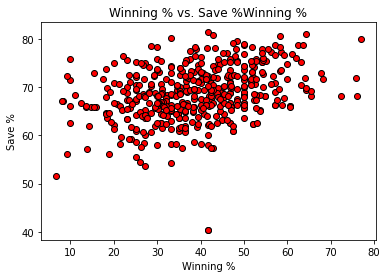

In [78]:
x_axis = gk_cleaning_Min_Save_P[("Winning %")]
x_limit = 60
#x_axis
y_axis = gk_cleaning_Min_Save_P[("Save %")]
y_limit = 100
#y_axis
#Minutes = gk_cleaning_900_drop_col[('Minutes')]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
#plt.ylim(0,3)
plt.title("Winning % vs. Save %Winning %")
plt.xlabel("Winning %")
plt.ylabel("Save %")
plt.savefig("../Scatter_Plots/Winning %_vs_Save %_.png")
plt.show()

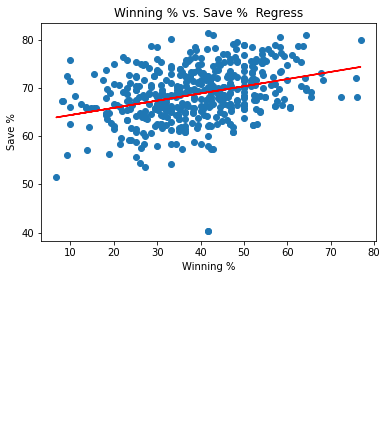

In [79]:
x_values = gk_cleaning_Min_Save_P[("Winning %")]
y_values = gk_cleaning_Min_Save_P[("Save %")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Winning % vs. Save %  Regress")
plt.xlabel("Winning %")
plt.ylabel("Save %")
plt.savefig("../Scatter_Plots/Winning %_vs_Save %_Regress.png")
plt.show()

In [80]:
# Minutes vs. Won, loss, Tie
gk_cleaning_900=gk_cleaning
indexNames = gk_cleaning_900[ gk_cleaning_900["Minutes"] < 900  ].index
# Delete these row indexes from dataFrame
gk_cleaning_900.drop(indexNames , inplace=True)
gk_cleaning_Min_WLT=gk_cleaning_900.drop(["Position", "Games Played", "GS", "ShO", "Winning %", "Goals Against", "Save %", "Goals Against Average", "Shots", "SV", "Season", "PKG/A"], axis = 1)
gk_cleaning_Min_WLT
gk_cleaning_Min_WLT.sort_values(by =['Minutes', 'Won', 'Loss', 'Tie'], ascending=False)


,Player,Club,Minutes,Won,Loss,Tie,Year
803,Stefan Frei,club,3060,20,10,4,2014
1150,Brad Guzan,club,3060,18,12,4,2019
863,Luis Robles,club,3060,18,10,6,2015
1070,Tim Melia,club,3060,18,8,8,2018
615,Kasey Keller,club,3060,18,7,9,2011
...,...,...,...,...,...,...,...
636,Greg Sutton,club,900,3,2,5,2011
823,Jeff Attinella,club,900,2,4,4,2014
1177,Jeff Attinella,club,900,1,7,2,2019
398,Noah Palmer,club,900,1,5,4,2006


In [81]:
#gk_win_vs_sav_df = AB.loc[gk_cleaning_Min_win("Player")]
avg_win_per_Mean_df = pd.DataFrame(gk_cleaning_Min_Win.groupby("Player")["Winning %"].mean().sort_values()).reset_index()
#avg_save_Mean_df = pd.DataFrame(gk_cleaning_Min_Save_P.groupby("Player")["Save %"].mean().sort_values()).reset_index()
avg_win_per_Mean_df

,Player,Winning %
0,Przemyslaw Tyton,6.700000
1,Kenny Stamatopoulos,8.300000
2,Noah Palmer,10.000000
3,Jay Nolly,14.300000
4,Danny Cepero,15.400000
...,...,...
119,Mark Dougherty,52.266667
120,Chris Konopka,52.400000
121,Tyler Miller,56.400000
122,Jorge Campos,57.200000


In [82]:
Min_vs_sav_P_Mean_df = pd.DataFrame(gk_cleaning_Min_Save_P.groupby("Player")["Save %"].mean().sort_values()).reset_index()
Min_vs_sav_P_Mean_df

,Player,Save %
0,Pat Harrington,40.400000
1,Przemyslaw Tyton,51.600000
2,John McCarthy,53.700000
3,Bryan Meredith,55.600000
4,Cody Cropper,57.300000
...,...,...
119,Bill Hamid,74.122222
120,Bouna Coundoul,74.225000
121,Josh Wicks,75.000000
122,Henry Ring,75.300000


In [83]:
GAA_Mean_df = pd.DataFrame(gk_cleaning_900_drop_col.groupby("Player")["Goals Against Average"].mean().sort_values()).reset_index()
GAA_Mean_df



,Player,Goals Against Average
0,Michael Gspurning,0.980000
1,Jimmy Nielsen,0.992500
2,Faryd Mondragón,1.040000
3,Kasey Keller,1.040000
4,Adam Kwarasey,1.090000
...,...,...
119,Jeff Causey,2.050000
120,Clement Diop,2.070000
121,Bo Oshoniyi,2.091667
122,Andrew Tarbell,2.170000


In [84]:
GK_Mean_totals_1 = pd.merge(avg_win_per_Mean_df, GAA_Mean_df, on='Player')
GK_Mean_totals_1

,Player,Winning %,Goals Against Average
0,Przemyslaw Tyton,6.700000,2.000000
1,Kenny Stamatopoulos,8.300000,1.670000
2,Noah Palmer,10.000000,1.300000
3,Jay Nolly,14.300000,1.640000
4,Danny Cepero,15.400000,1.620000
...,...,...,...
119,Mark Dougherty,52.266667,1.686667
120,Chris Konopka,52.400000,1.480000
121,Tyler Miller,56.400000,1.260000
122,Jorge Campos,57.200000,1.156667


In [85]:
GK_Mean_totals_2 = pd.merge(GK_Mean_totals_1, Min_vs_sav_P_Mean_df, on='Player')
GK_Mean_totals_2

,Player,Winning %,Goals Against Average,Save %
0,Przemyslaw Tyton,6.700000,2.000000,51.600000
1,Kenny Stamatopoulos,8.300000,1.670000,67.200000
2,Noah Palmer,10.000000,1.300000,71.400000
3,Jay Nolly,14.300000,1.640000,61.900000
4,Danny Cepero,15.400000,1.620000,72.900000
...,...,...,...,...
119,Mark Dougherty,52.266667,1.686667,66.350000
120,Chris Konopka,52.400000,1.480000,67.400000
121,Tyler Miller,56.400000,1.260000,68.700000
122,Jorge Campos,57.200000,1.156667,73.633333


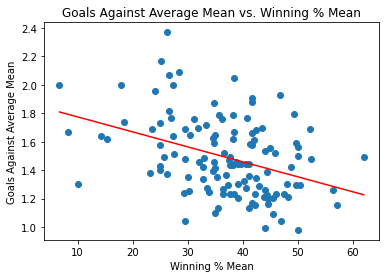

In [86]:
x_values =  GK_Mean_totals_2[("Winning %")]
y_values = GK_Mean_totals_2[("Goals Against Average")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.xlabel("Winning % Mean")
plt.ylabel("Goals Against Average Mean")
plt.title("Goals Against Average Mean vs. Winning % Mean")
plt.savefig("../Scatter_Plots/GAA_Mean_vs_Winning_per_Mean_regress.png")

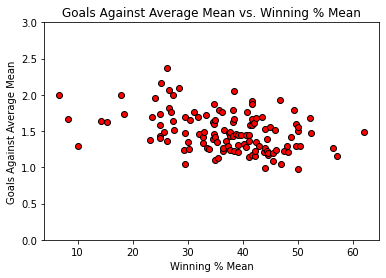

<Figure size 432x288 with 0 Axes>

In [87]:
x_axis = GK_Mean_totals_2[("Winning %")]
x_limit = 60
x_axis
y_axis = GK_Mean_totals_2[("Goals Against Average")]
y_limit = 3
y_axis
#Minutes = gk_cleaning_900_drop_col[('Minutes')]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",)
plt.ylim(0,3)
plt.title("Goals Against Average Mean vs. Winning % Mean")
plt.xlabel("Winning % Mean")
plt.ylabel("Goals Against Average Mean")
plt.show()
plt.savefig("../Scatter_Plots/GAA_Mean_vs_Winning_per_Mean.png")